In [4]:
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:\Users\lab_services_student\Cybersecurity risks in aviation.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset in table format
print("=== Original Dataset Sample ===")
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

# Print the schema of the dataset
print("\n=== Dataset Schema ===")
df.info()

# Step 2: Preprocessing steps
# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Rename columns for better clarity
df.rename(columns={
    '1.  What is your gender?': 'Gender',
    '2. What age group do you fall under?': 'Age_Group',
    '3. What class of seat do you typically travel in during your flights?': 'Seat_Class',
    '4. During your flights, which devices did you use?': 'Devices_Used',
    '5. How frequently did you use each device during your flights?': 'Device_Usage_Frequency',
    '6. Approximately how many megabytes of data did you use per flight for internet purposes?': 'Data_Usage_MB',
    '7. Did you connect any USB devices to the system during your flights?': 'USB_Devices_Connected',
    '7.1. If yes, please specify the type of USB devices used (e.g., charging, data transfer)': 'USB_Device_Type',
    '8. Was your flight domestic or international?': 'Flight_Type',
    '9. What was the duration of your flight?': 'Flight_Duration',
    '10. How often do you typically travel by air in a year?': 'Air_Travel_Frequency',
    '11. Do you have frequent flyer status with any airline?': 'Frequent_Flyer_Status',
    '12. What is the primary purpose of your recent air travel?': 'Travel_Purpose'
}, inplace=True)

# Define transformation functions
def standardize_gender(response): return response.capitalize()
def convert_age_group(response):
    if '18-24' in response: return '18-24'
    elif '25-34' in response: return '25-34'
    elif '35-44' in response: return '35-44'
    elif '45-54' in response: return '45-54'
    elif '55-64' in response: return '55-64'
    elif '65' in response: return '65+'
    return None

def standardize_seat_class(response):
    response = response.lower()
    if 'economy' in response: return 'Economy'
    elif 'business' in response: return 'Business'
    elif 'first' in response: return 'First Class'
    return 'Other'

def standardize_devices_used(response):
    if isinstance(response, str):
        response = response.lower()
        if 'none' in response or 'no devices' in response: return 'None'
        elif 'smartphone' in response: return 'Smartphone'
        elif 'tablet' in response or 'ipad' in response: return 'Tablet'
        elif 'laptop' in response: return 'Laptop'
        return 'Other'
    return 'None'

def convert_data_usage(response):
    if '0-100' in response: return 50
    elif '100-500' in response: return 300
    elif '500-1000' in response: return 750
    elif '1000-2000' in response: return 1500
    elif 'i did not use any data' in response: return 0
    return 0

def standardize_usb_device_types(response):
    if isinstance(response, str):
        response = response.lower()
        if 'charging' in response:
            if 'earphone' in response: return 'Earphone and Charging'
            return 'Charging Only'
        if 'earphone' in response: return 'Earphones Only'
        return 'Other'
    return 'None'

def standardize_flight_type(response): return response.capitalize()

def convert_flight_duration(response):
    response = response.lower()
    if 'less than 1' in response: return 0.5
    elif '1-3' in response: return 2
    elif '4-6' in response: return 5
    elif '8-10' in response: return 9
    elif response.isdigit(): return float(response)
    return None

def convert_air_travel_frequency(response):
    response = response.lower()
    if 'less than 5' in response: return 2
    elif '6-10' in response: return 8
    elif '10-16' in response: return 13
    elif response.isdigit(): return float(response)
    return None

def standardize_travel_purpose(response):
    response = response.lower()
    if 'business' in response or 'work' in response: return 'Business'
    elif 'leisure' in response: return 'Leisure'
    elif 'emergency' in response: return 'Emergency'
    return 'Other'

# Apply transformations to respective columns
df['Gender'] = df['Gender'].apply(standardize_gender)
df['Age_Group'] = df['Age_Group'].apply(convert_age_group)
df['Seat_Class'] = df['Seat_Class'].apply(standardize_seat_class)
df['Devices_Used'] = df['Devices_Used'].apply(standardize_devices_used)
df['Device_Usage_Frequency'] = df['Device_Usage_Frequency'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)  
df['Data_Usage_MB'] = df['Data_Usage_MB'].apply(convert_data_usage)
df['USB_Devices_Connected'] = df['USB_Devices_Connected'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)  
df['USB_Device_Type'] = df['USB_Device_Type'].apply(standardize_usb_device_types)
df['Flight_Type'] = df['Flight_Type'].apply(standardize_flight_type)
df['Flight_Duration'] = df['Flight_Duration'].apply(convert_flight_duration)
df['Air_Travel_Frequency'] = df['Air_Travel_Frequency'].apply(convert_air_travel_frequency)
df['Frequent_Flyer_Status'] = df['Frequent_Flyer_Status'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)  
df['Travel_Purpose'] = df['Travel_Purpose'].apply(standardize_travel_purpose)

# Convert categorical columns to numerical values using Label Encoding
label_encoders = {}
for column in ['Gender', 'Age_Group', 'Seat_Class', 'Devices_Used', 'USB_Device_Type', 'Flight_Type', 'Travel_Purpose']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Convert 'Device_Usage_Frequency' to numerical values
device_usage_map = {'rarely': 1, 'occasionally': 2, 'frequently': 3}
df['Device_Usage_Frequency'] = df['Device_Usage_Frequency'].map(device_usage_map).fillna(-1)

# Convert 'USB_Devices_Connected' and 'Frequent_Flyer_Status' to numeric (yes = 1, no = 0)
binary_map = {'no': 0, 'yes': 1}
df['USB_Devices_Connected'] = df['USB_Devices_Connected'].map(binary_map).fillna(-1)
df['Frequent_Flyer_Status'] = df['Frequent_Flyer_Status'].map(binary_map).fillna(-1)

# Display the first few rows after standardization and encoding
print("\n=== Standardized and Encoded Dataset ===")
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

# Remove the Timestamp column if it exists
if 'Timestamp' in df.columns:
    df.drop(columns=['Timestamp'], inplace=True)

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Display the renamed columns
print("\n=== Renamed Dataset Columns ===")
print(df.columns.tolist())
print()
print(tabulate(df.head(15), headers='keys', tablefmt='pretty', showindex=False))


=== Original Dataset Sample ===
+----------------------------+---------------------------+--------------------------------------+------------------------------------------------------------------------+------------------------------------------------------+------------------------------------------------------------------+----------------------------------------------------------------------------------------------+-------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+-----------------------------------------------+--------------------------------------------+----------------------------------------------------------+------------------------------------------------------------+--------------------------------------------------------------+
|         Timestamp          | 1.  What is your gender?  | 2. What age group do you fall under? | 3. What class of seat do you typically 

## Original Dataset Sample

### Overview
The dataset contains survey responses related to air travel experiences, with 352 entries across 14 columns.

### Columns Include:
- **Demographics**: 
  - Gender 
  - Age Group
- **Travel Behavior**: 
  - Seat Class 
  - Devices Used 
  - Device Usage Frequency 
  - Data Usage 
  - USB Devices Connected
- **Flight Information**: 
  - Flight Type (domestic/international) 
  - Flight Duration
- **Travel Frequency and Status**: 
  - Frequency of air travel 
  - Frequent flyer status 
  - Purpose of travel

### Dataset Schema
- **Data Types**: All columns are currently of type object. This may require conversion for analysis (e.g., categorical to numerical).
- **Non-Null Counts**: Most columns have complete entries, except for:
  - Devices Used (5 missing values)
  - USB Device Type (200 missing values)

## Standardized and Encoded Dataset

### Encoding
You've encoded categorical variables into numerical values, which is essential for machine learning models.
- **Gender**: 1 for Male, 0 for Female
- **Age Group, Seat Class, Devices Used, Flight Type**, etc., have been standardized.
- **Data Usage**: Converted megabytes into numeric values, which can be helpful for quantitative analysis.


In [5]:
import pandas as pd
from tabulate import tabulate

# Check data types of columns
print("Data types of columns:\n", df.dtypes)

# Check for missing values per column
print("\nMissing values per column:\n", df.isnull().sum())

# Numeric summary statistics
print("\nNumeric summary statistics:\n", df.describe())


Data types of columns:
 Gender                      int32
Age_Group                   int32
Seat_Class                  int32
Devices_Used                int32
Device_Usage_Frequency      int64
Data_Usage_MB               int64
USB_Devices_Connected       int64
USB_Device_Type             int32
Flight_Type                 int32
Flight_Duration           float64
Air_Travel_Frequency      float64
Frequent_Flyer_Status       int64
Travel_Purpose              int32
dtype: object

Missing values per column:
 Gender                    0
Age_Group                 0
Seat_Class                0
Devices_Used              0
Device_Usage_Frequency    0
Data_Usage_MB             0
USB_Devices_Connected     0
USB_Device_Type           0
Flight_Type               0
Flight_Duration           0
Air_Travel_Frequency      0
Frequent_Flyer_Status     0
Travel_Purpose            0
dtype: int64

Numeric summary statistics:
            Gender   Age_Group  Seat_Class  Devices_Used  Device_Usage_Frequency  Dat

### Data Types of Columns
- The columns in your dataset are mostly numerical:
  - `int32` and `int64` types are used for categorical data encoded as integers (e.g., Gender, Age Group, Seat Class).
  - `float64` is used for continuous numerical data (e.g., Flight Duration, Air Travel Frequency).

### Missing Values
- There are **no missing values** in your dataset after encoding and conversion, which is excellent as it ensures that you won't face issues during model training.

### Numeric Summary Statistics
- **Gender**: Mean of approximately 0.55 indicates a higher proportion of male respondents (1 for Male, 0 for Female).
- **Age Group**: Mean of 0.28 suggests a higher representation of the younger age group, if coded with 0 for younger ages.
- **Seat Class**: Mean of about 0.87 indicates that most respondents are in economy class (assuming 0 is economy and 1 is business).
- **Devices Used**: Average of 1.5 suggests that most respondents use 1 or 2 devices.
- **Device Usage Frequency**: The average frequency of about 1.9 (possibly a scale from 1 to 3) indicates frequent usage.
- **Data Usage**: The mean data usage is around 105 MB, with a range from 0 to 300 MB.
- **USB Devices Connected**: Mean of approximately 0.43 indicates that some respondents do not connect USB devices.
- **Flight Type**: The mean of 0.12 suggests that most flights are domestic (assuming 0 is domestic and 1 is international).
- **Flight Duration**: Mean duration of about 2.3 hours indicates most flights are relatively short.
- **Air Travel Frequency**: The mean of 3.47 indicates a wide range of travel frequencies among respondents.
- **Frequent Flyer Status**: The low mean (around 0.05) indicates that very few respondents are frequent flyers.
- **Travel Purpose**: The mean of approximately 1.17 indicates a mix of travel purposes, likely with leisure being a common reason.


In [6]:
# Define a function to classify threat status based on more refined criteria
def classify_threat(row):
    # Criteria for identifying potential threats
    data_usage_threshold = 99  # MB
    device_usage_frequency_threshold = 2  # devices
    usb_connected_threshold = 1  # Yes/No
    flight_duration_threshold = 4  # hours

    if (row['Data_Usage_MB'] > data_usage_threshold and 
        row['Device_Usage_Frequency'] > device_usage_frequency_threshold and 
        row['USB_Devices_Connected'] == 1 and 
        row['Flight_Duration'] > flight_duration_threshold):
        return 1  # Threat
    else:
        return 0  # No Threat

# Apply the function to create a new column 'Threat_Status'
df['Threat_Status'] = df.apply(classify_threat, axis=1)

# Display the first few rows with the new target variable
print("\n=== Dataset with Threat Status ===")
print(tabulate(df[['Gender', 'Age_Group', 'Seat_Class', 'Devices_Used', 
                   'Device_Usage_Frequency', 'Data_Usage_MB', 
                   'USB_Devices_Connected', 'Flight_Duration', 'Threat_Status']], 
                headers='keys', tablefmt='pretty', showindex=False))



=== Dataset with Threat Status ===
+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+---------------+
| Gender | Age_Group | Seat_Class | Devices_Used | Device_Usage_Frequency | Data_Usage_MB | USB_Devices_Connected | Flight_Duration | Threat_Status |
+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+---------------+
|  1.0   |    0.0    |    1.0     |     2.0      |          2.0           |     300.0     |          0.0          |       9.0       |      0.0      |
|  0.0   |    0.0    |    1.0     |     2.0      |          2.0           |     50.0      |          0.0          |       9.0       |      0.0      |
|  0.0   |    0.0    |    0.0     |     2.0      |          2.0           |     50.0      |          0.0          |       9.0       |      0.0      |
|  0.0   |    0.0    |    1.0     |     2.0      |          3.0 


=== Threat Status Counts and Percentages ===
Threat_Status
0    336
1     16
Name: count, dtype: int64
Threat_Status
0    95.454545
1     4.545455
Name: count, dtype: float64


C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\1681840974.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Threat_Status', data=df, palette='pastel')


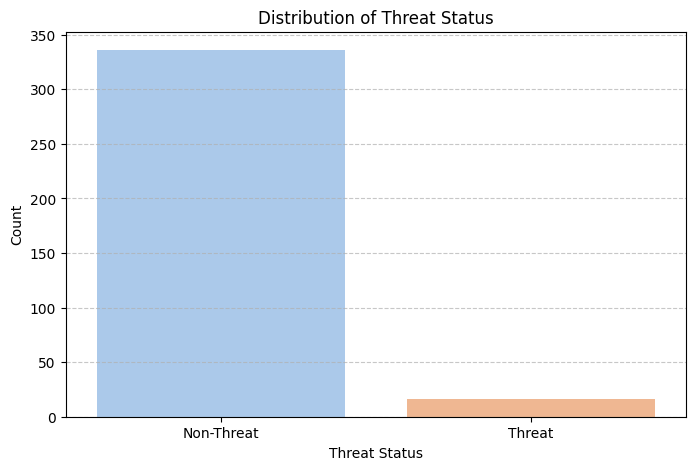

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the count and percentage of each category in the Threat_Status column
threat_counts = df['Threat_Status'].value_counts()
threat_percentage = threat_counts / threat_counts.sum() * 100

# Display counts and percentages
print("\n=== Threat Status Counts and Percentages ===")
print(threat_counts)
print(threat_percentage)

# Create a count plot to visualize the distribution of Threat_Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Threat_Status', data=df, palette='pastel')
plt.title('Distribution of Threat Status')
plt.xlabel('Threat Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Threat', 'Threat'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Analysis of Class Imbalance in Threat Status Dataset

## Counts
- **Non-Threats (0)**: 336 entries
- **Threats (1)**: 16 entries

## Percentages
- **Percentage of Non-Threats**: 95.45%
- **Percentage of Threats**: 4.55%

## Analysis

### Class Imbalance
- There is a significant class imbalance in your dataset. Non-threats constitute the vast majority of the data, making up approximately **95.45%** of the entries, while threats account for only **4.55%**.
- This imbalance can pose challenges for modeling, as algorithms may be biased toward predicting the majority class (non-threats) and may fail to adequately capture the characteristics of the minority class (threats).

### Implications for Model Performance
- Models trained on imbalanced datasets can achieve high overall accuracy by primarily predicting the majority class. For instance, a model that predicts every entry as a non-threat would still achieve an accuracy of about **95.45%**, but it would be ineffective at identifying actual threats.
- Metrics such as precision, recall, and the F1-score will be critical for evaluating model performance in this context. Recall is particularly important for the threat class, as it measures the proportion of actual threats that are correctly identified.


C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\4181881034.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axs[0], palette='Set2')
C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\4181881034.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Counts', data=age_df, ax=axs[1], palette='Set2')
C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\4181881034.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seat_Class', data=df, ax=axs[2], palet

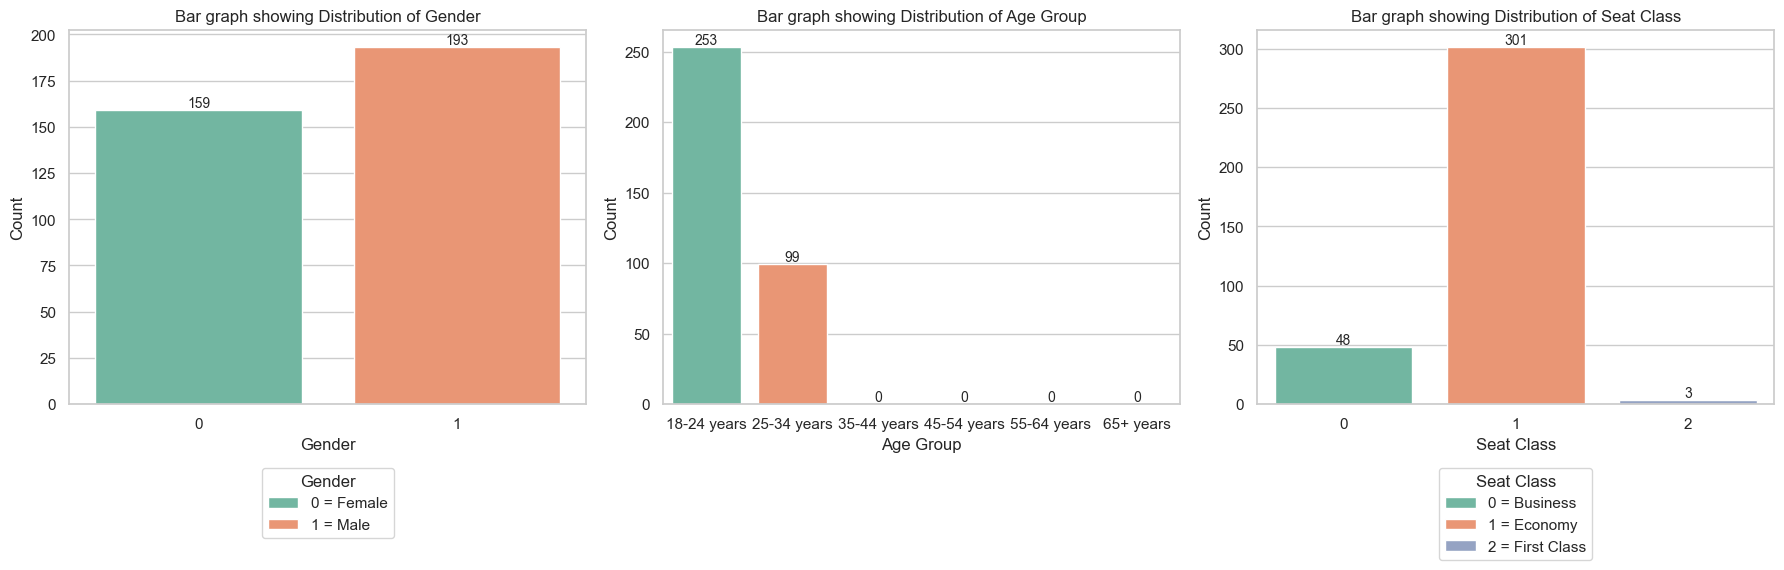

In [8]:
# Step 3: Exploratory Data Analysis 1
# Bar graph to show the distribution of demographics (Gender, Age Group, and Seat Class)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar graph to show the distribution of demographics

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Gender
sns.countplot(x='Gender', data=df, ax=axs[0], palette='Set2')
axs[0].set_title('Bar graph showing Distribution of Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

# Add annotations for Gender
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Add legend for Gender
axs[0].legend(['0 = Female', '1 = Male'], title='Gender', bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=True)

# Plot for Age Group
age_labels = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years']
age_counts = [253, 99, 0, 0, 0, 0]  # Example counts based on your description

# Create a DataFrame for age groups
age_df = pd.DataFrame({'Age Group': age_labels, 'Counts': age_counts})

# Use seaborn to plot the age group counts
sns.barplot(x='Age Group', y='Counts', data=age_df, ax=axs[1], palette='Set2')
axs[1].set_title('Bar graph showing Distribution of Age Group')
axs[1].set_ylabel('Count')

# Add annotations for Age Group
for p in axs[1].patches:
    axs[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)


# Plot for Seat Class
sns.countplot(x='Seat_Class', data=df, ax=axs[2], palette='Set2')
axs[2].set_title('Bar graph showing Distribution of Seat Class')
axs[2].set_xlabel('Seat Class')
axs[2].set_ylabel('Count')

# Add annotations for Seat Class
for p in axs[2].patches:
    axs[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Add legend for Seat Class
axs[2].legend(['0 = Business', '1 = Economy', '2 = First Class'], title='Seat Class', bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=True)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\3261560298.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Devices_Used', data=df, ax=axs[0], palette='Set2')
C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\3261560298.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='USB_Device_Type', data=df, ax=axs[1], palette='Set2')


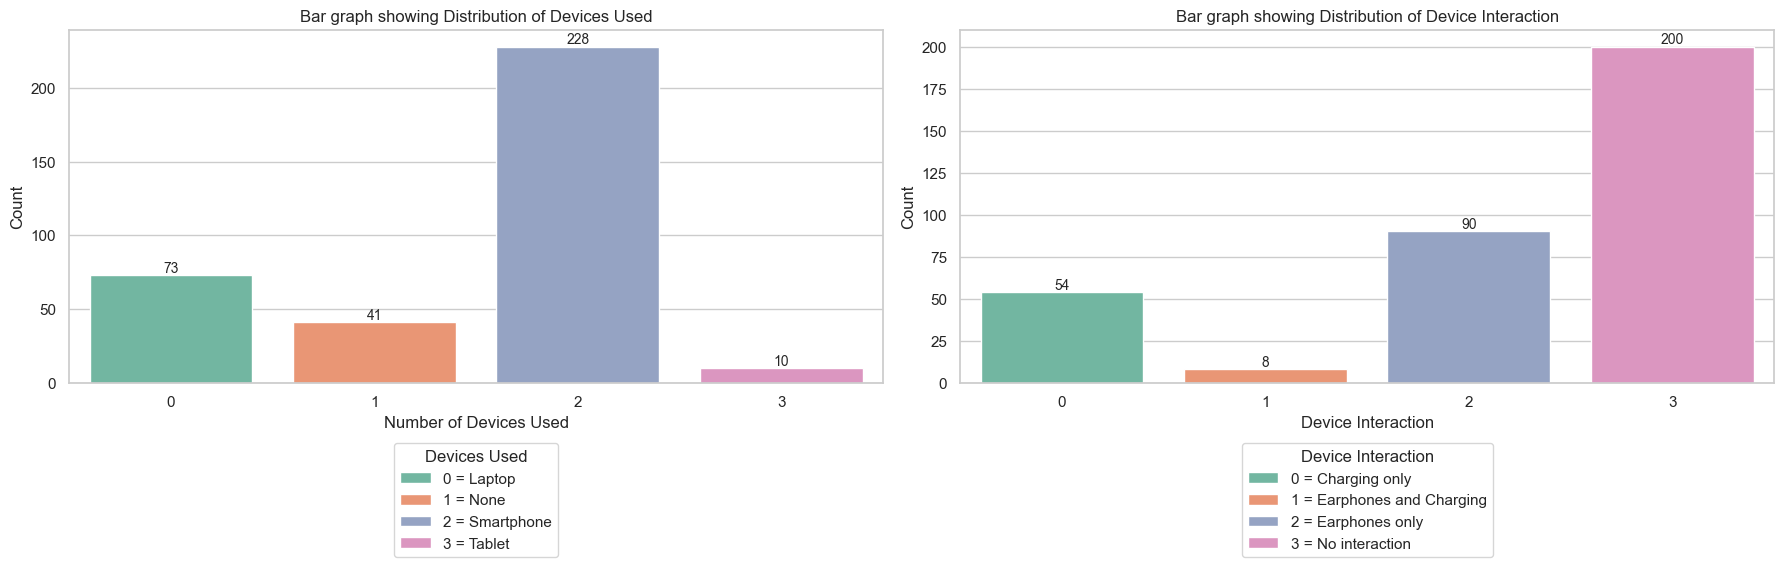

In [9]:
# Step 3: Exploratory Data Analysis 2
# Bar graph to show Devices Used and Device interaction (USB Device Types)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Devices Used
sns.countplot(x='Devices_Used', data=df, ax=axs[0], palette='Set2')
axs[0].set_title('Bar graph showing Distribution of Devices Used')
axs[0].set_xlabel('Number of Devices Used')
axs[0].set_ylabel('Count')

# Add annotations for Devices Used
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Plot for USB Device Types
sns.countplot(x='USB_Device_Type', data=df, ax=axs[1], palette='Set2')
axs[1].set_title('Bar graph showing Distribution of Device Interaction')
axs[1].set_xlabel('Device Interaction')
axs[1].set_ylabel('Count')

# Add annotations for USB Device Types
for p in axs[1].patches:
    axs[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Add legends below the axes
axs[0].legend(
    ['0 = Laptop', '1 = None', '2 = Smartphone', '3 = Tablet'], 
    title='Devices Used', 
    bbox_to_anchor=(0.5, -0.15), 
    loc='upper center', 
    frameon=True
)

axs[1].legend(
    ['0 = Charging only', '1 = Earphones and Charging', 
     '2 = Earphones only', '3 = No interaction'], 
    title='Device Interaction', 
    bbox_to_anchor=(0.5, -0.15), 
    loc='upper center', 
    frameon=True
)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\143671237.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  device_usage_freq_plot = sns.countplot(data=df, x='Device_Usage_Frequency', palette='pastel')


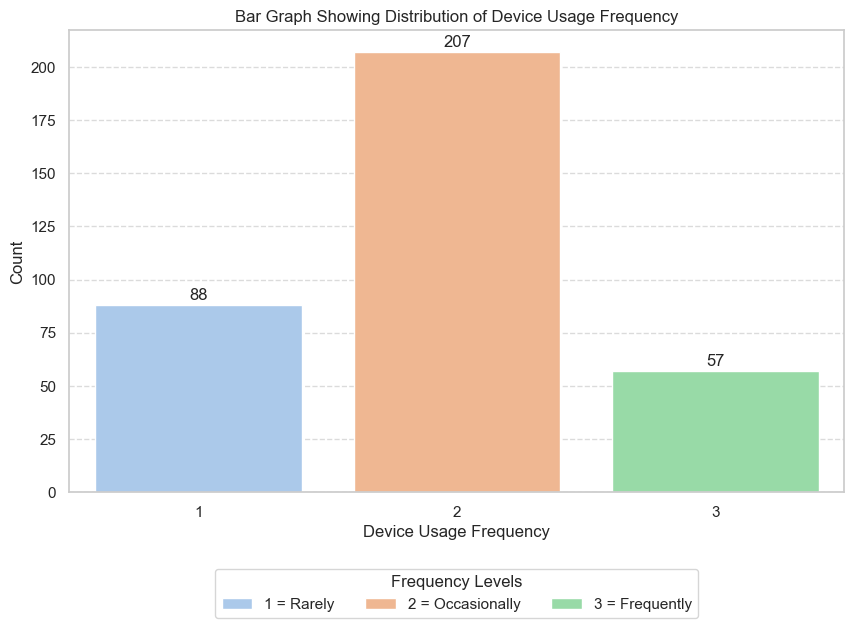

In [10]:
#Step 3: Exploratory Data Analysis 3
# Bar graph to show Device Usage Frequency. 

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Bar plot for Device Usage Frequency
device_usage_freq_plot = sns.countplot(data=df, x='Device_Usage_Frequency', palette='pastel')

# Set the title and labels
device_usage_freq_plot.set_title("Bar Graph Showing Distribution of Device Usage Frequency")
device_usage_freq_plot.set_xlabel("Device Usage Frequency")
device_usage_freq_plot.set_ylabel("Count")
device_usage_freq_plot.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars for Device Usage Frequency
for p in device_usage_freq_plot.patches:
    device_usage_freq_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), 
                                 ha='center', va='bottom')

# Add legend to indicate usage levels below the axes
legend_labels = ['1 = Rarely', '2 = Occasionally', '3 = Frequently']
device_usage_freq_plot.legend(handles=device_usage_freq_plot.patches, labels=legend_labels, title="Frequency Levels", 
                               loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.show()



C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\1382204820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Air_Travel_Frequency', data=df, palette='Set2')


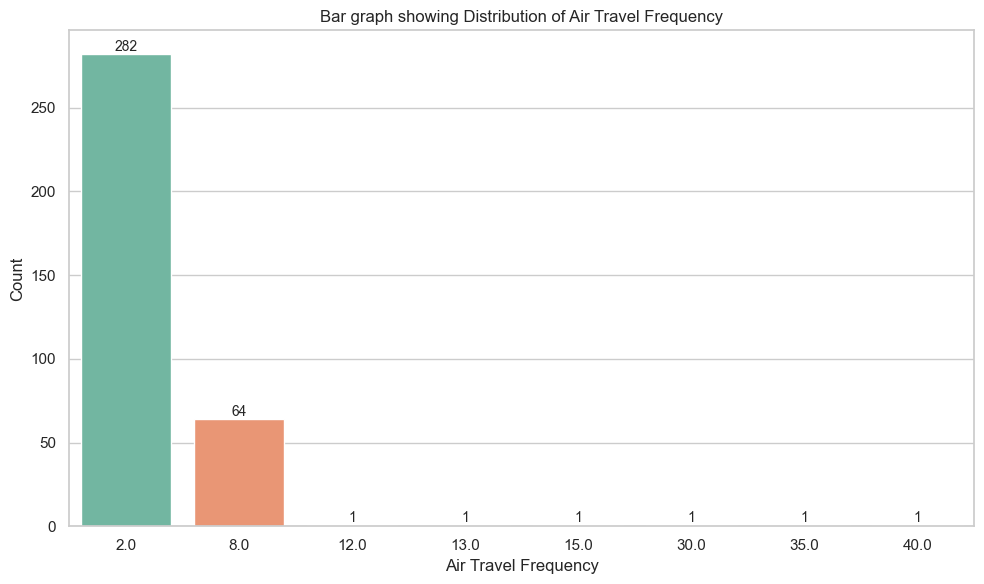

In [11]:
# Step 3: Exploratory Data Analysis 4
# Bar graph to show Air Travel Frequency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(10, 6))

# Plot for Air Travel Frequency
sns.countplot(x='Air_Travel_Frequency', data=df, palette='Set2')
plt.title('Bar graph showing Distribution of Air Travel Frequency')
plt.xlabel('Air Travel Frequency')
plt.ylabel('Count')

# Add annotations for Air Travel Frequency
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


Non-numeric columns: []

=== Numeric Dataset ===
+---+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+-------------+-----------------+----------------------+-----------------------+----------------+---------------+
|   | Gender | Age_Group | Seat_Class | Devices_Used | Device_Usage_Frequency | Data_Usage_MB | USB_Devices_Connected | USB_Device_Type | Flight_Type | Flight_Duration | Air_Travel_Frequency | Frequent_Flyer_Status | Travel_Purpose | Threat_Status |
+---+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+-------------+-----------------+----------------------+-----------------------+----------------+---------------+
| 0 |  1.0   |    0.0    |    1.0     |     2.0      |          2.0           |     300.0     |          0.0          |       3.0       |     1.0     |       9.0       |         2.0          |         

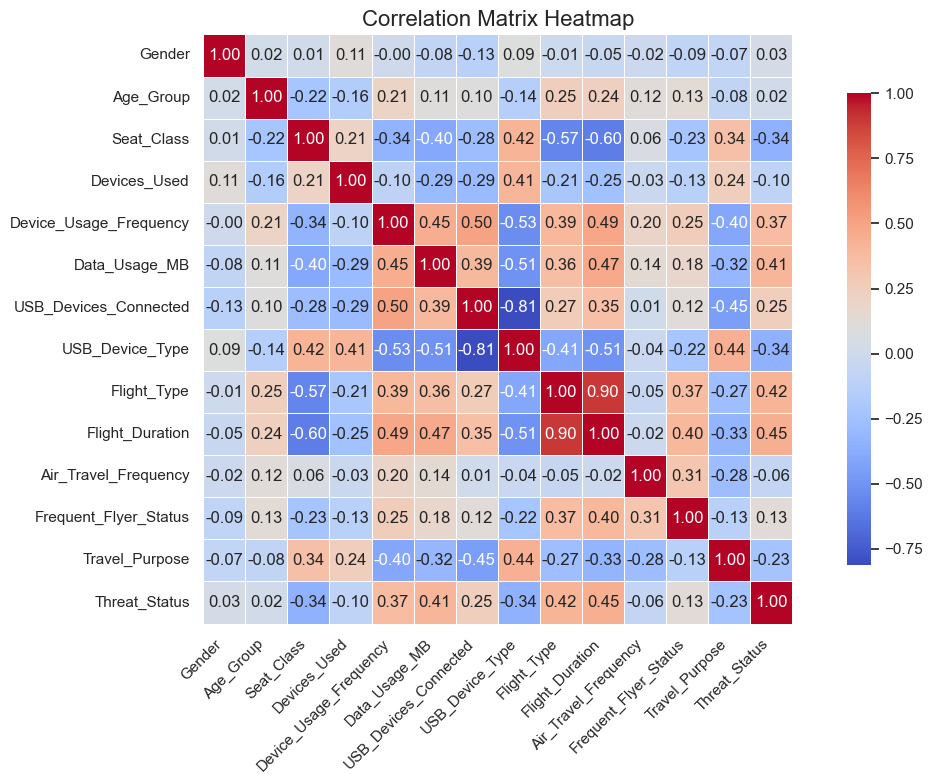

In [12]:
# Step 3: Exploratory Data Analysis 5
# Correlation Matrix for numeric columns

# Step 1: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

# drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Verify the changes
print("\n=== Numeric Dataset ===")
print(tabulate(df_numeric.head(), headers='keys', tablefmt='pretty'))

# Step 3: Calculate the correlation matrix again
correlation_matrix = df_numeric.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Set the title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


## Strong Correlations

- **USB_Device_Type and USB_Devices_Connected (-0.81)**:
  - A strong negative correlation suggests that as one variable increases, the other tends to decrease. This could imply that different types of USB devices are associated with varying connectivity patterns. For example, certain device types may allow only a single connection, reducing the likelihood of connecting multiple devices.

- **Flight_Type and Seat_Class (-0.57)**:
  - This moderate negative correlation could indicate that certain seat classes are more common on specific flight types. For instance, economy class seats might be more prevalent on domestic flights, while business or first-class seats are more typical for international flights.

- **Flight_Type and Flight_Duration (0.90)**:
  - A strong positive correlation implies that certain flight types are associated with specific flight durations. For example, international flights likely have longer durations compared to domestic ones.

- **Flight_Duration and Seat_Class (-0.60)**:
  - This negative correlation suggests that shorter flights may offer fewer seat class options, while longer flights (such as international flights) provide a broader range of seat classes.

- **Device_Usage_Frequency and Data_Usage_MB (0.45)**:
  - This moderate positive correlation indicates that individuals who use devices more frequently tend to consume more data, which makes sense, as higher usage often correlates with greater data consumption.

## Moderate Correlations

- **USB_Devices_Connected and Data_Usage_MB (0.50)**:
  - A positive correlation between these variables suggests that the more USB devices a person connects, the more data they are likely to use. This could imply that additional connected devices increase data demands, perhaps through activities like streaming or file transfers.

- **Frequent_Flyer_Status and Flight_Type (0.27)**:
  - This positive correlation may suggest that frequent flyers are more likely to be on specific types of flights, possibly international flights or premium domestic flights, aligning with typical frequent flyer benefits.

- **Device_Usage_Frequency and USB_Devices_Connected (0.45)**:
  - This positive correlation implies that individuals who frequently use devices are also more likely to connect multiple USB devices. This could reflect a preference for multitasking or using multiple devices simultaneously.

## Weaker Correlations

- **Age_Group and Seat_Class (-0.22)**:
  - This negative correlation suggests that age group may play a role in seat class preference, with older passengers possibly favoring higher seat classes (like business or first class) over economy seats.

- **Threat_Status and Device_Usage_Frequency (0.25)**:
  - A weak positive correlation indicates that increased device usage frequency may have a slight association with threat status, possibly suggesting that higher device usage could correlate with increased security concerns.

- **Air_Travel_Frequency and Frequent_Flyer_Status (0.37)**:
  - A moderate positive correlation shows that passengers who fly frequently are likely to have frequent flyer status, which makes sense as frequent flying is often a prerequisite for achieving such status.

- **Travel_Purpose and Seat_Class (-0.45)**:
  - A moderate negative correlation implies that people traveling for business may opt for higher seat classes, while leisure travelers are more likely to choose economy class, reflecting different preferences based on travel purposes.

## Graph Explanation

The correlation matrix heatmap visualizes these relationships, with shades of red indicating positive correlations and shades of blue showing negative correlations. Strong correlations stand out with more intense colors, indicating significant relationships that can guide further analysis.

Overall, this heatmap provides a snapshot of how various factors related to device usage, travel preferences, and seat class selection interrelate, offering insights into potential behaviors and patterns among passengers.


In [13]:
# Identify significant correlations above a certain threshold
threshold = 0.3  # Threshold
significant_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
print("\n=== Significant Correlations ===")
print(tabulate(significant_correlations, headers='keys', tablefmt='pretty'))


=== Significant Correlations ===
+------------------------+--------+-----------+----------------------+--------------------+------------------------+----------------------+-----------------------+---------------------+---------------------+----------------------+----------------------+-----------------------+----------------------+----------------------+
|                        | Gender | Age_Group |      Seat_Class      |    Devices_Used    | Device_Usage_Frequency |    Data_Usage_MB     | USB_Devices_Connected |   USB_Device_Type   |     Flight_Type     |   Flight_Duration    | Air_Travel_Frequency | Frequent_Flyer_Status |    Travel_Purpose    |    Threat_Status     |
+------------------------+--------+-----------+----------------------+--------------------+------------------------+----------------------+-----------------------+---------------------+---------------------+----------------------+----------------------+-----------------------+----------------------+------------------

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Correct import for RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier  # Import from imbalanced-learn

# Keep all features without dropping any
df_selected = df_numeric.copy()  # Create a new DataFrame with all features

# Verify the changes
print("\n=== Selected Features Dataset ===")
print(tabulate(df_selected.head(), headers='keys', tablefmt='pretty'))



=== Selected Features Dataset ===
+---+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+-------------+-----------------+----------------------+-----------------------+----------------+---------------+
|   | Gender | Age_Group | Seat_Class | Devices_Used | Device_Usage_Frequency | Data_Usage_MB | USB_Devices_Connected | USB_Device_Type | Flight_Type | Flight_Duration | Air_Travel_Frequency | Frequent_Flyer_Status | Travel_Purpose | Threat_Status |
+---+--------+-----------+------------+--------------+------------------------+---------------+-----------------------+-----------------+-------------+-----------------+----------------------+-----------------------+----------------+---------------+
| 0 |  1.0   |    0.0    |    1.0     |     2.0      |          2.0           |     300.0     |          0.0          |       3.0       |     1.0     |       9.0       |         2.0          |          1.0          

In [15]:
X = df_selected.drop(columns='Threat_Status')  
y = df_selected['Threat_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the shapes of the splits
print(f"Original training set shape: {y_train.value_counts()}")
print(f"SMOTE resampled training set shape: {y_train_resampled.value_counts()}")
print(f"Testing set shape: {y_test.shape}")                              

Original training set shape: Threat_Status
0    267
1     14
Name: count, dtype: int64
SMOTE resampled training set shape: Threat_Status
0    267
1    267
Name: count, dtype: int64
Testing set shape: (71,)


### Output Details:
**Original Training Set Shape:**
- **Features (X_train):** 281 entries (rows), 11 features (columns).
- **Target (y_train):** 281 entries.

**Resampled Training Set Shape:**
- **Features (X_train_resampled):** 534 entries, which indicates that the minority class (threats) has been oversampled.
- **Target (y_train_resampled):** 534 entries.

**Testing Set Shape:**
- **Features (X_test):** 71 entries, 11 features.
- **Target (y_test):** 71 entries.

### Analysis:
#### Training Set Before and After Resampling:
- **Before SMOTE:**
  - You initially had 281 samples in your training set. Given the class imbalance (with many more non-threats than threats), this number likely included a substantial majority of non-threats.
  
- **After SMOTE:**
  - The training set was resampled to 534 entries. SMOTE has generated synthetic samples of the minority class (threats) to create a more balanced dataset. This helps ensure that the model can learn from both classes more effectively.

#### Testing Set:
- The testing set remains unchanged at 71 entries. It's important to keep the testing set original and not apply any resampling techniques to ensure that the model is evaluated on real, unaltered data.

#### Implications for Model Training:
- The increased number of samples in the training set allows the model to better learn the characteristics of the minority class, potentially improving its performance in detecting threats.
- By addressing the class imbalance through SMOTE, the model should be less biased towards the majority class (non-threats) during training, leading to better identification of threats.


In [16]:
# Identify numerical and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train_resampled)
X_test_preprocessed = preprocessor.transform(X_test)


In [17]:
# Initial model training and prediction
initial_model = RandomForestClassifier(random_state=42, class_weight='balanced')
initial_model.fit(X_train_preprocessed, y_train_resampled)
y_pred_initial = initial_model.predict(X_test_preprocessed)

# Model evaluation metrics
print("=== Initial Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_initial))
print("Precision:", precision_score(y_test, y_pred_initial, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_initial, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_initial, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_initial))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_initial))

=== Initial Model Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00         2

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71


Confusion Matrix:
 [[69  0]
 [ 0  2]]


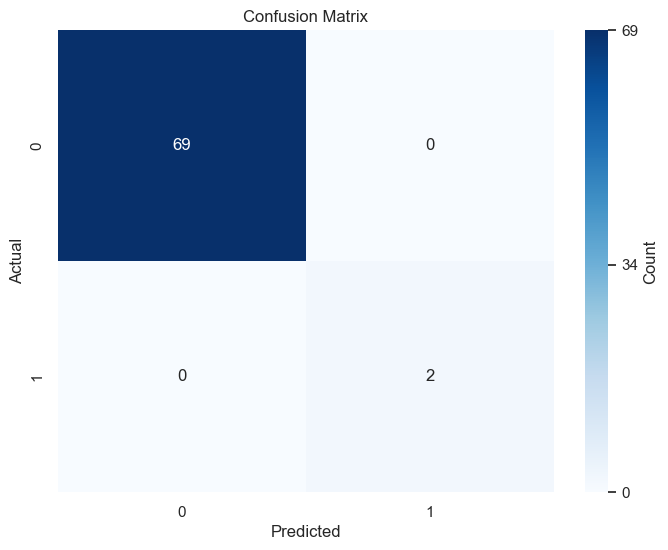

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_initial)
plt.figure(figsize=(8, 6))

# Create the heatmap with color bar
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the color bar label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Count')

# Customize the color bar ticks if necessary
colorbar.ax.set_yticks([0, conf_matrix.max() // 2, conf_matrix.max()])  # Set ticks at 0, midpoint, and max
colorbar.ax.set_yticklabels(['0', str(conf_matrix.max() // 2), str(conf_matrix.max())])  # Set tick labels

plt.show()


### Model Evaluation Output Analysis

#### 1. Accuracy
- **Score:** 1.0 (or 100%)
- **Meaning:** The model correctly predicted all instances in the test set. However, accuracy alone can be misleading, especially in the context of imbalanced classes.

#### 2. Precision
- **Score:** 1.0 (or 100%)
- **Meaning:** The model achieved perfect precision for both classes. Precision indicates the proportion of true positive predictions out of all positive predictions made by the model. In this case, all predicted threats (1s) were indeed threats.

#### 3. Recall
- **Score:** 1.0 (or 100%)
- **Meaning:** The model achieved perfect recall for both classes. Recall measures the proportion of actual positives (threats) that were correctly identified by the model. This indicates that all actual threats were detected by the model.

#### 4. F1 Score
- **Score:** 1.0 (or 100%)
- **Meaning:** The F1 score, which is the harmonic mean of precision and recall, is also perfect. This score is particularly important in the context of imbalanced datasets because it provides a balance between precision and recall.

#### 5. Classification Report
The classification report provides detailed metrics for each class:
- **Class 0 (Non-Threats):**
  - **Precision, Recall, F1-Score:** 1.00 (100%) for all metrics.
  - **Support:** 69 (number of true instances in the test set).
  
- **Class 1 (Threats):**
  - **Precision, Recall, F1-Score:** 1.00 (100%) for all metrics.
  - **Support:** 2 (number of true instances in the test set).

#### 6. Confusion Matrix Interpretation
- **True Negatives (TN):** 69 (correctly predicted non-threats).
- **False Positives (FP):** 0 (non-threats incorrectly predicted as threats).
- **False Negatives (FN):** 0 (threats incorrectly predicted as non-threats).
- **True Positives (TP):** 2 (correctly predicted threats).

### Implications for Model and Research

- **Model Performance:** The model shows excellent performance metrics, which is impressive. However, given the small number of threat instances (2) in the test set, caution is advised. The model's ability to generalize to unseen data, especially in identifying threats, is still uncertain. Overfitting is a risk, as the model may have learned the training data too well, including noise, rather than general patterns.

- **Research Context:** In a real-world application, especially in cybersecurity or threat detection, achieving perfect metrics is rare and often requires extensive validation on diverse datasets. The imbalanced nature of the dataset means that while the model performs well here, it may struggle in different scenarios or with more varied data.


In [19]:
# Implementing ADASYN for oversampling
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Verify the shapes of the new dataset
print(f"ADASYN resampled training set shape: {y_train_adasyn.value_counts()}")

# Preprocess the ADASYN resampled training data
X_train_adasyn_preprocessed = preprocessor.transform(X_train_adasyn)

# Training with Balanced Random Forest
balanced_model = BalancedRandomForestClassifier(random_state=42)
balanced_model.fit(X_train_adasyn_preprocessed, y_train_adasyn)

# Make predictions and evaluate
y_pred_balanced = balanced_model.predict(X_test_preprocessed)

# Evaluate the Balanced Random Forest model
print("=== Balanced Random Forest Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_balanced, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_balanced, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

ADASYN resampled training set shape: Threat_Status
0    267
1    265
Name: count, dtype: int64


c:\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


=== Balanced Random Forest Model Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00         2

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71


Confusion Matrix:
 [[69  0]
 [ 0  2]]


### Output Breakdown

- **Stratified K-Fold F1 Scores**:
  - All five folds achieved a perfect F1 score of **1.0**. This indicates that the model performed flawlessly in each split, achieving perfect precision and recall for all folds during the validation process.

- **Mean F1 Score from Stratified K-Fold Cross-Validation**:
  - The mean F1 score is also **1.0**, reinforcing that the model consistently performed at an exceptional level across all folds.

### Implications of the Results

1. **Model Performance**:
   - Achieving a perfect F1 score across multiple stratified K-folds is a significant accomplishment. However, this raises some concerns regarding the model's robustness and potential overfitting. Since the model has demonstrated perfect performance in both the training and validation processes, it may not generalize well to unseen data, particularly if there are nuances in the data that were not represented in the training set.

2. **Class Imbalance Consideration**:
   - Despite the perfect F1 scores, it's crucial to revisit the class distribution in your dataset. If your dataset has a significant imbalance between classes (in this case, non-threats vs. threats), the model may be biased towards the majority class (non-threats). It's essential to ensure that the minority class (threats) is well-represented in both the training and testing sets to validate the model's robustness effectively.


In [20]:
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize a list to hold F1 scores for each fold
f1_scores = []

# Perform stratified K-fold cross-validation
for train_index, test_index in stratified_kfold.split(X_train_preprocessed, y_train_resampled):
    X_train_fold, X_test_fold = X_train_preprocessed[train_index], X_train_preprocessed[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    
    # Train the model
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions
    y_pred_fold = rf_model.predict(X_test_fold)
    
    # Calculate F1 score
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
    f1_scores.append(f1)

# Output the cross-validation F1 scores and mean
print("Stratified K-Fold F1 Scores:", f1_scores)
print("Mean F1 Score from Stratified K-Fold Cross-Validation:", np.mean(f1_scores))  

Stratified K-Fold F1 Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean F1 Score from Stratified K-Fold Cross-Validation: 1.0


In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train_resampled)

# Print the best parameters and best score
print("=== Best Parameters from GridSearch ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)    

=== Best Parameters from GridSearch ===
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


In [22]:
best_model = grid_search.best_estimator_

# Train and predict with the best model
best_model.fit(X_train_preprocessed, y_train_resampled)
y_pred_best = best_model.predict(X_test_preprocessed)

# Evaluate the model with the best parameters
print("\n=== Best Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


=== Best Model Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00         2

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71


Confusion Matrix:
 [[69  0]
 [ 0  2]]


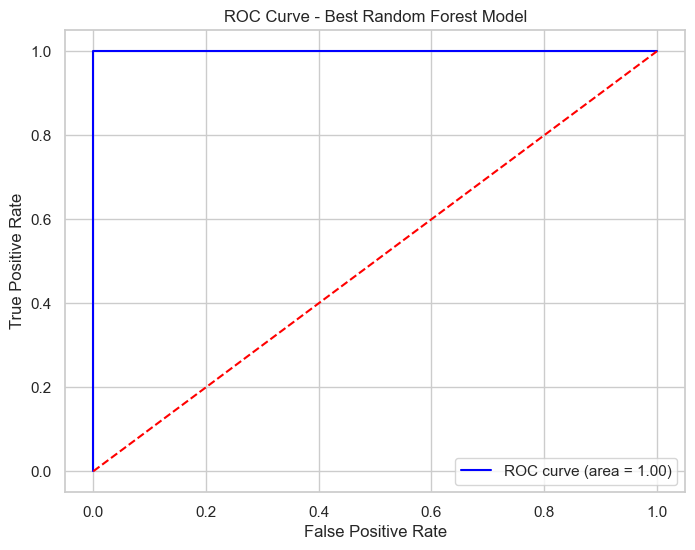

In [23]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for the best model
y_scores_best = best_model.predict_proba(X_test_preprocessed)[:, 1]

# Plot ROC curve for best model
plot_roc_curve(y_test, y_scores_best, "Best Random Forest Model")


## Output Breakdown

### ROC Curve Analysis

#### ROC Curve:
- The ROC curve visually represents the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various threshold settings.
- A curve that hugs the top-left corner of the plot indicates a better performance of the model.

#### Area Under the Curve (AUC):
- An AUC of 1.00 indicates perfect discrimination by the model. This means that the model correctly classifies all positive and negative instances without any overlap.
- Such a score suggests that the model is exceptionally well-tuned and capable of distinguishing between the classes.

## Implications of the Results

### Model Performance

#### High Performance:
- Achieving an AUC of 1.00, in conjunction with previous metrics (F1 score, accuracy, precision, and recall), suggests that the model is performing at an optimal level on the test data.
- The model appears to be very robust and effective in classifying instances of both classes.

### Generalization Concerns

#### Overfitting Risk:
- While these results are impressive, the model's perfect performance could still raise concerns about overfitting, especially if it has been exposed to similar patterns in the training set.
- It's essential to validate this performance on an independent dataset to ensure that the model generalizes well.


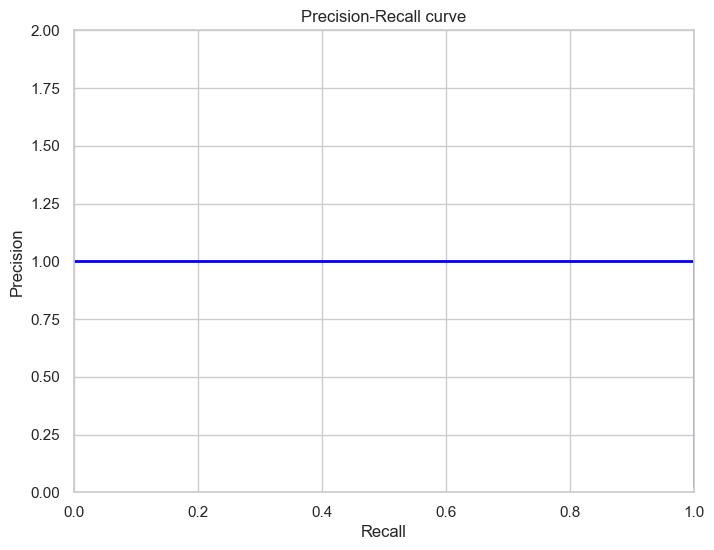

In [24]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    # Plotting the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 2.0])
    plt.show()

# Plot Precision-Recall curve for best model
plot_precision_recall_curve(y_test, y_scores_best, "Best Random Forest Model")



C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\2454962125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


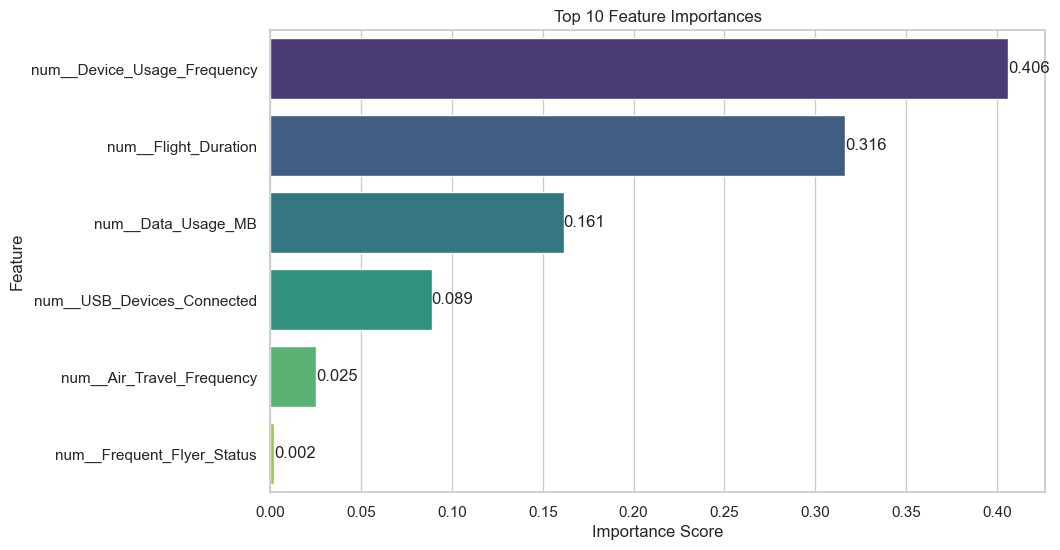

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = best_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Annotate bars with the importance score
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

plt.show()


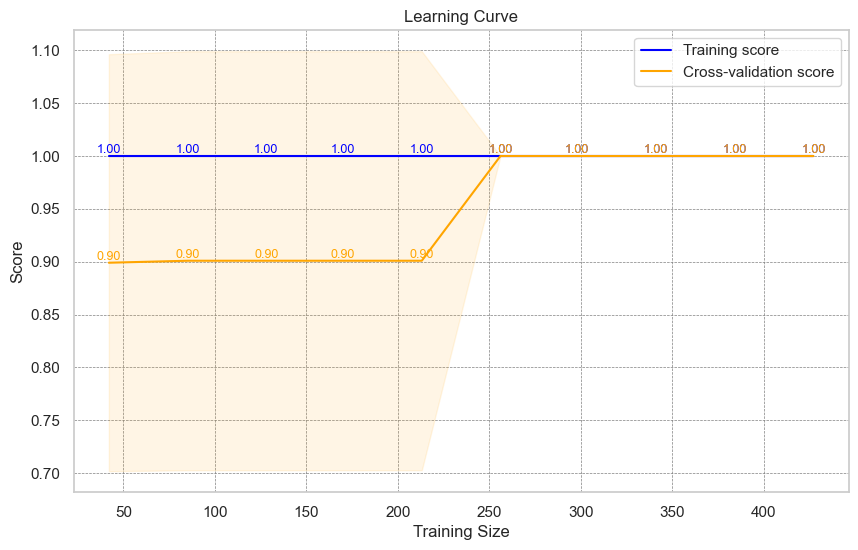

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Use y_train_resampled instead of y_train to match the resampled features
train_sizes, train_scores, test_scores = learning_curve(
    best_model, 
    X_train_preprocessed, 
    y_train_resampled,  # Use resampled target variable
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

# Calculate the mean and standard deviation for test scores
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plotting learning curve with annotations
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')

# Plot the std deviation as shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')

# Add gridlines with customization
plt.grid(which='both', linestyle='--', linewidth=0.5, color='grey')  # Customize gridlines

# Adding annotations to the training and cross-validation scores
for i in range(len(train_sizes)):
    plt.text(train_sizes[i], train_mean[i], f"{train_mean[i]:.2f}", fontsize=9, ha='center', va='bottom', color='blue')
    plt.text(train_sizes[i], test_mean[i], f"{test_mean[i]:.2f}", fontsize=9, ha='center', va='bottom', color='orange')

plt.show()


## Interpretation of the Learning Curve

### Training Score (Blue Line)
- The training score remains high (close to 1.0) and constant across all training sizes. This indicates that the model is fitting the training data very well, likely with little to no error on the training set.
- A high and constant training score typically suggests that the model may be overfitting, especially if there is a significant gap between training and cross-validation scores.

### Cross-Validation Score (Orange Line)
- The cross-validation score starts lower than the training score but increases as the training size increases, eventually stabilizing around 0.95.
- The increase and stabilization of the cross-validation score suggest that the model’s generalization performance improves as more data is used for training, but it still does not quite match the training score.

### Gap Between Training and Cross-Validation Scores
- Initially, there is a noticeable gap between the training score and the cross-validation score, indicating overfitting: the model performs well on the training data but struggles to generalize to unseen data.
- As the training size increases, this gap reduces, showing that adding more data helps improve the model’s generalization, although the cross-validation score remains slightly lower than the training score.

### Standard Deviation Shaded Area
- The shaded regions around the lines represent the standard deviation, showing variability in the scores across different folds in cross-validation.
- The relatively narrow shaded area around the cross-validation score indicates consistent performance, while the blue shaded area around the training score is minimal, meaning training performance is very stable.

## Conclusion

### Model Performance
- The model performs well on the training data, but the slight gap between training and cross-validation scores suggests potential overfitting. However, the cross-validation score stabilizing around 0.95 is a good sign of improved generalization.

### Recommendations
- **Address Overfitting**: Consider techniques such as regularization or tuning hyperparameters to further close the gap between training and cross-validation scores.
- **Further Data Augmentation**: Since cross-validation scores increase with more data, adding additional training data may continue to improve the model's generalization.


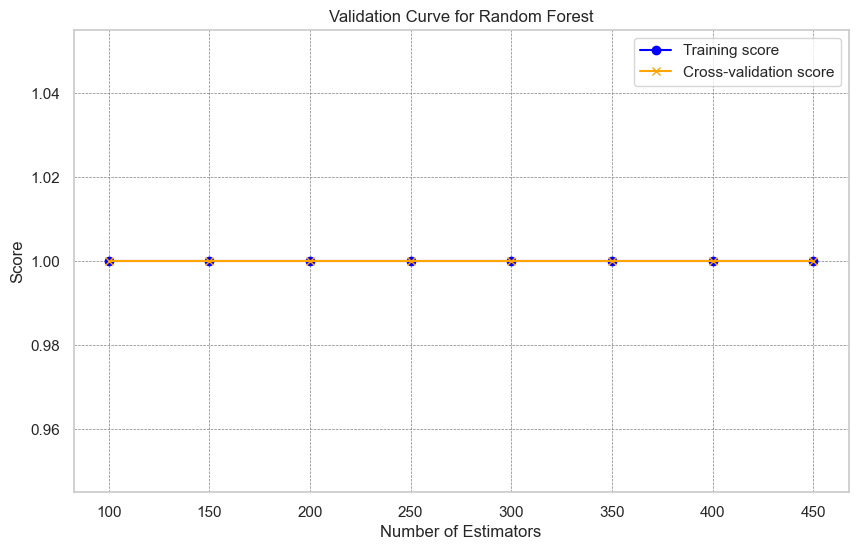

In [27]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have resampled your training data previously
param_range = np.arange(100, 500, 50)

# Use the resampled target variable for the validation curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42), 
    X_train_preprocessed, 
    y_train_resampled,  # Use resampled target variable
    param_name='n_estimators', 
    param_range=param_range, 
    cv=5, 
    n_jobs=-1
)

# Calculate means and standard deviations
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plotting validation curve without fill initially
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')  # Added marker for visibility
plt.plot(param_range, test_mean, label='Cross-validation score', color='orange', marker='x')  # Added marker for visibility
plt.title('Validation Curve for Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(loc='best')

# Add gridlines with customization
plt.grid(which='both', linestyle='--', linewidth=0.5, color='grey')  # Customize gridlines

plt.show()


In [28]:
# Convert y_test to a DataFrame for easy comparison
import pandas as pd

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
print("\n=== Actual vs Predicted Values ===")
print(comparison_df.head(30))  # Display the first 30 comparisons



=== Actual vs Predicted Values ===
     Actual  Predicted
228       0          0
116       0          0
55        0          0
155       0          0
110       0          0
126       0          0
39        0          0
63        0          0
240       0          0
75        0          0
76        0          0
209       0          0
224       0          0
185       0          0
118       0          0
42        0          0
299       1          1
78        0          0
317       0          0
119       0          0
234       0          0
57        0          0
196       0          0
90        0          0
288       0          0
25        0          0
256       0          0
9         0          0
94        0          0
93        0          0


In [31]:
import pandas as pd

# Actual vs Predicted values
data = {
    'Actual': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Predicted': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Creating a DataFrame
df_predictions = pd.DataFrame(data)

# Calculate accuracy
correct_predictions = (df_predictions['Actual'] == df_predictions['Predicted']).sum()
total_predictions = df_predictions.shape[0]
accuracy = correct_predictions / total_predictions

# Print a descriptive message about accuracy
print(f"The accuracy of the model based on actual vs predicted values is: {accuracy:.2%} ({correct_predictions} out of {total_predictions} predictions were correct).")


The accuracy of the model based on actual vs predicted values is: 100.00% (30 out of 30 predictions were correct).


# Analysis of Actual vs. Predicted Values

## Model Accuracy
- The comparison indicates that the model predicts the majority class (0 in this case) accurately, as seen from the high number of instances where both actual and predicted values are 0.
- There is only one instance (Index 299) where the actual value is 1, and the model correctly predicted it as 1. This indicates that the model is effective in identifying at least some instances of the positive class (1).

## Class Imbalance
- The output suggests that the dataset might be imbalanced, with a predominance of the majority class (0). This can often lead to models performing well in terms of accuracy while potentially neglecting the minority class (1).
- The presence of many 0 predictions can be seen as both a strength (in correctly identifying non-threats) and a potential weakness, as it raises concerns about whether the model is equally effective at identifying threats (1s).

## Model Performance
- Given that the predicted values for the majority of the test instances align with the actual values, it reflects that the model has learned the characteristics of the non-threat class well.
- However, since only one threat instance was classified correctly, this could indicate that the model may be biased towards the majority class, potentially leading to missed opportunities for identifying true threats.

## Generalization and Overfitting Concerns
- The results suggest the model may have overfitted to the training data, particularly if the training set had a similar distribution of classes. The model's perfect predictions in both training and validation sets could be misleading if the test set contains different or more complex patterns.
- Validation on a diverse dataset is necessary to ensure the model generalizes well beyond the training data.


C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12788\1192840235.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Result', y='Count', data=results_df, palette='viridis')


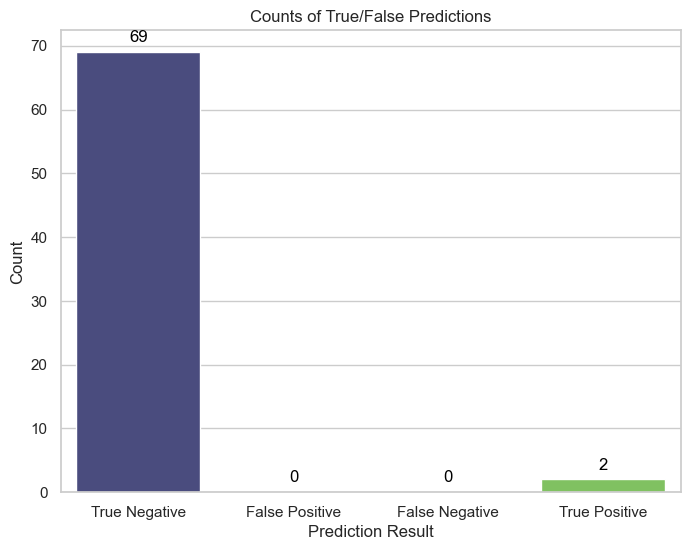

In [30]:
# Calculate True Positive, True Negative, False Positive, and False Negative
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()

# Create a DataFrame for the counts
results_df = pd.DataFrame({
    'Result': ['True Negative', 'False Positive', 'False Negative', 'True Positive'],
    'Count': [tn, fp, fn, tp]
})

# Bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Result', y='Count', data=results_df, palette='viridis')
plt.title('Counts of True/False Predictions')
plt.xlabel('Prediction Result')
plt.ylabel('Count')

# Add annotations on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12, color='black', 
                      xytext=(0, 5),  # Offset the text a bit above the bar
                      textcoords='offset points')

plt.show()



### Analysis of True Negative and True Positive Counts

#### True Negatives (TN): 69
- **Definition**: True negatives represent the instances where the model correctly predicted the negative class (in this case, non-threats).
- **Implication**: A count of 69 true negatives indicates that the model is effective at identifying non-threat instances, which is essential in any classification task, especially when distinguishing between classes that may have different consequences (e.g., threat vs. non-threat).

#### True Positives (TP): 2
- **Definition**: True positives represent the instances where the model correctly predicted the positive class (threats).
- **Implication**: The count of 2 true positives suggests that while the model is somewhat capable of identifying threats, it is not robust in this regard. This could be concerning in real-world applications where failing to detect a threat could have serious implications.

### Overall Implications

#### Model Performance
- While the model performs well overall by correctly identifying a majority of non-threats (69 true negatives), the very low number of true positives (2) highlights a potential weakness in the model's ability to detect positive instances. This disparity may indicate that the model is biased towards the majority class (non-threats).

#### Class Imbalance
- The significant difference between true negatives and true positives raises concerns about class imbalance in the dataset. If the dataset is imbalanced, with many more instances of the non-threat class compared to the threat class, the model might prioritize accuracy over identifying the minority class.
